In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [9]:
X = df[['Age','EstimatedSalary']]# Only these two features have been taken for modelling as per the instructions in the assignment pblm statement
Y = df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=5, stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
func.fit(x_train)
x_train_std = func.transform(x_train)
x_test_std = func.transform(x_test)

**Fitting K-NN to the Training set**

In [12]:
num_neighbors = [1,2,3,4,5,6,7,8,9,10]
acc_results = []
for num in num_neighbors:
    model = KNeighborsClassifier(n_neighbors=num).fit(x_train_std, y_train)
    acc_results.append(accuracy_score(y_test, model.predict(x_test_std)))

In [13]:
acc_results

[0.8, 0.85, 0.875, 0.9, 0.8625, 0.8875, 0.875, 0.875, 0.875, 0.875]

In [14]:
np.array(acc_results).argmax() #k =4 gives the maximum accuracy of 90%

3

**Predicting the Test set results**

In [15]:
final_model = KNeighborsClassifier(n_neighbors=4).fit(x_train_std, y_train)
y_pred = final_model.predict(x_test_std)

**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

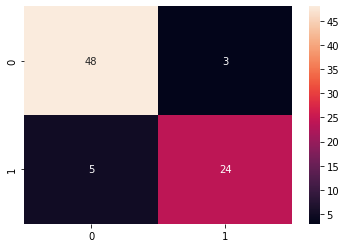

In [17]:
sns.heatmap(cm, annot=True)

In [18]:
accuracy_score(y_test,y_pred)

0.9